# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore") 
from datetime import datetime
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

# Importing Confirmed cases of COVID-19 directly from githubusercontent as updated dataset

In [2]:
data_confirmed_cases= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

### Selecting the Specific dates as per paper

In [3]:
data_confirmed_cases=data_confirmed_cases.iloc[:,0:80]

# Exploratory data analysis

### Five top records of data

In [4]:
data_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,106,114,114,166,192,235,269,270,299,337
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,197,212,223,243,259,277,304,333,361,377
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,454,511,584,716,847,986,1171,1251,1320,1423
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,308,334,370,376,390,428,439,466,501,525
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5,7,7,7,8,8,8,10,14,16


### Five last records of data

In [5]:
data_confirmed_cases.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,98,109,116,119,134,161,194,217,237,254
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,28,29,35,35,36,39,39,39,39,39
283,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,7,7,7,8,8,9,9,9,9,10


### Coloumns/features in data

In [6]:
data_confirmed_cases.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20'],
      dtype='object')

### Data information

In [7]:
data_confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  89 non-null     object 
 1   Country/Region  284 non-null    object 
 2   Lat             282 non-null    float64
 3   Long            282 non-null    float64
 4   1/22/20         284 non-null    int64  
 5   1/23/20         284 non-null    int64  
 6   1/24/20         284 non-null    int64  
 7   1/25/20         284 non-null    int64  
 8   1/26/20         284 non-null    int64  
 9   1/27/20         284 non-null    int64  
 10  1/28/20         284 non-null    int64  
 11  1/29/20         284 non-null    int64  
 12  1/30/20         284 non-null    int64  
 13  1/31/20         284 non-null    int64  
 14  2/1/20          284 non-null    int64  
 15  2/2/20          284 non-null    int64  
 16  2/3/20          284 non-null    int64  
 17  2/4/20          284 non-null    int

### Data types of all coloumns

In [8]:
data_confirmed_cases.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/2/20              int64
4/3/20              int64
4/4/20              int64
4/5/20              int64
4/6/20              int64
Length: 80, dtype: object

### Checking Null Values and Province/State has Nan values, we will fix next

In [9]:
data_confirmed_cases[data_confirmed_cases.isnull().any(axis=1)].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,106,114,114,166,192,235,269,270,299,337
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,197,212,223,243,259,277,304,333,361,377
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,454,511,584,716,847,986,1171,1251,1320,1423
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,308,334,370,376,390,428,439,466,501,525
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5,7,7,7,8,8,8,10,14,16


### Count of Null values,  this count is 185 and all is from Province/State

In [10]:
np.sum(data_confirmed_cases.isnull().any(axis=1))

197

### Data Description, here we can see the values of columns as minimum value, maximum value, counts etc

In [11]:
data_confirmed_cases.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
count,282.000000,282.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.00000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,20.106368,21.958718,1.961268,2.313380,3.323944,5.059859,7.464789,10.31338,19.647887,21.721831,...,2360.897887,2558.894366,2788.644366,3059.823944,3346.676056,3636.524648,3932.338028,4143.820423,4397.542254,4659.767606
std,25.841453,75.893366,26.402603,26.499491,32.992032,45.919425,64.175242,86.46777,212.163754,213.470672,...,11840.605688,12880.295522,14211.136177,15787.654673,17612.653850,19496.845632,21429.995089,23171.671545,24911.526833,26765.673027
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.643279,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,7.000000,8.000000,8.000000,10.000000,10.750000,11.750000,13.000000,14.000000,14.000000,15.000000
50%,21.607879,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,94.000000,100.000000,106.500000,122.000000,132.500000,138.000000,142.000000,145.500000,155.500000,166.500000
75%,40.950592,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,543.500000,577.000000,614.000000,668.000000,730.250000,777.250000,822.750000,883.500000,914.500000,944.000000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.00000,3554.000000,3554.000000,...,127417.000000,143544.000000,165698.000000,192079.000000,223237.000000,255516.000000,287918.000000,319755.000000,348998.000000,380786.000000


# Prepartion of data_confirmed_cases data

### Deleitng the Province/State	Country/Region	Lat	Long	 coloumns

In [12]:
data_confirmed_cases=data_confirmed_cases.drop(columns=['Province/State','Country/Region', 'Lat','Long'])

In [13]:
data_confirmed_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,0,0,0,0,0,0,0,0,0,0,...,106,114,114,166,192,235,269,270,299,337
1,0,0,0,0,0,0,0,0,0,0,...,197,212,223,243,259,277,304,333,361,377
2,0,0,0,0,0,0,0,0,0,0,...,454,511,584,716,847,986,1171,1251,1320,1423
3,0,0,0,0,0,0,0,0,0,0,...,308,334,370,376,390,428,439,466,501,525
4,0,0,0,0,0,0,0,0,0,0,...,5,7,7,7,8,8,8,10,14,16


### Getting sum of all dates

In [14]:
data_confirmed_cases=data_confirmed_cases.sum()
data_confirmed_cases.head()

1/22/20     557
1/23/20     657
1/24/20     944
1/25/20    1437
1/26/20    2120
dtype: int64

### Saving the sum of all dates in dataframe

In [15]:
data_confirmed_cases=pd.DataFrame(data_confirmed_cases)
data_confirmed_cases.head()

,0
1/22/20,557
1/23/20,657
1/24/20,944
1/25/20,1437
1/26/20,2120


### Creating new column of Dates

In [16]:
data_confirmed_cases['Dates']=data_confirmed_cases.index
data_confirmed_cases.head()

,0,Dates
1/22/20,557,1/22/20
1/23/20,657,1/23/20
1/24/20,944,1/24/20
1/25/20,1437,1/25/20
1/26/20,2120,1/26/20


### Reseting the index

In [17]:
data_confirmed_cases=data_confirmed_cases.reset_index(drop=True)
data_confirmed_cases.head()

,0,Dates
0,557,1/22/20
1,657,1/23/20
2,944,1/24/20
3,1437,1/25/20
4,2120,1/26/20


### Renaming the column

In [18]:
data_confirmed_cases=data_confirmed_cases.rename(columns={0:'data_confirmed_cases'})
data_confirmed_cases=data_confirmed_cases[['Dates','data_confirmed_cases']]
data_confirmed_cases.head()

,Dates,data_confirmed_cases
0,1/22/20,557
1,1/23/20,657
2,1/24/20,944
3,1/25/20,1437
4,1/26/20,2120


### Date settings and data preparation

In [19]:
data_confirmed_cases['times'] = pd.to_datetime(data_confirmed_cases['Dates'])  
data_confirmed_cases.set_index('times', inplace=True)                   
data_confirmed_cases.sort_index(ascending=True, inplace=True)
tar='Confirmed Cases Predictions'
data_confirmed_cases.rename(columns={'data_confirmed_cases':tar}, inplace=True)
data_confirmed_cases=data_confirmed_cases[[tar]]

### Spliting date into  month, year and Day of month

In [20]:
def create_features(data, label=None):
    data['date'] = data.index
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofmonth'] = data['date'].dt.day
    X = data[['month','year','dayofmonth']]
    if label:
        y = data[label]
        return X, y
    return X

### Data for training input and prediction output

In [21]:
X=data_confirmed_cases.copy()
X= create_features(X)
y=data_confirmed_cases
y=np.array(y)
y_t = y[:int(0.87*(len(y)))]

# Ensemble Technique to combine algorithms (SVM + Random Forest Regression) and making one

In [130]:
SVR_model = SVR()
RF_model  = RandomForestRegressor()

In [131]:
Ens = VotingRegressor( estimators= [('model1',SVR_model),('model2',RF_model)])
Ens= Ens.fit(X , y)
Ens

VotingRegressor(estimators=[('model1', SVR()),
                            ('model2', RandomForestRegressor())])

## Graph of the actual and predicted Confirmed cases with 10 days forecasting

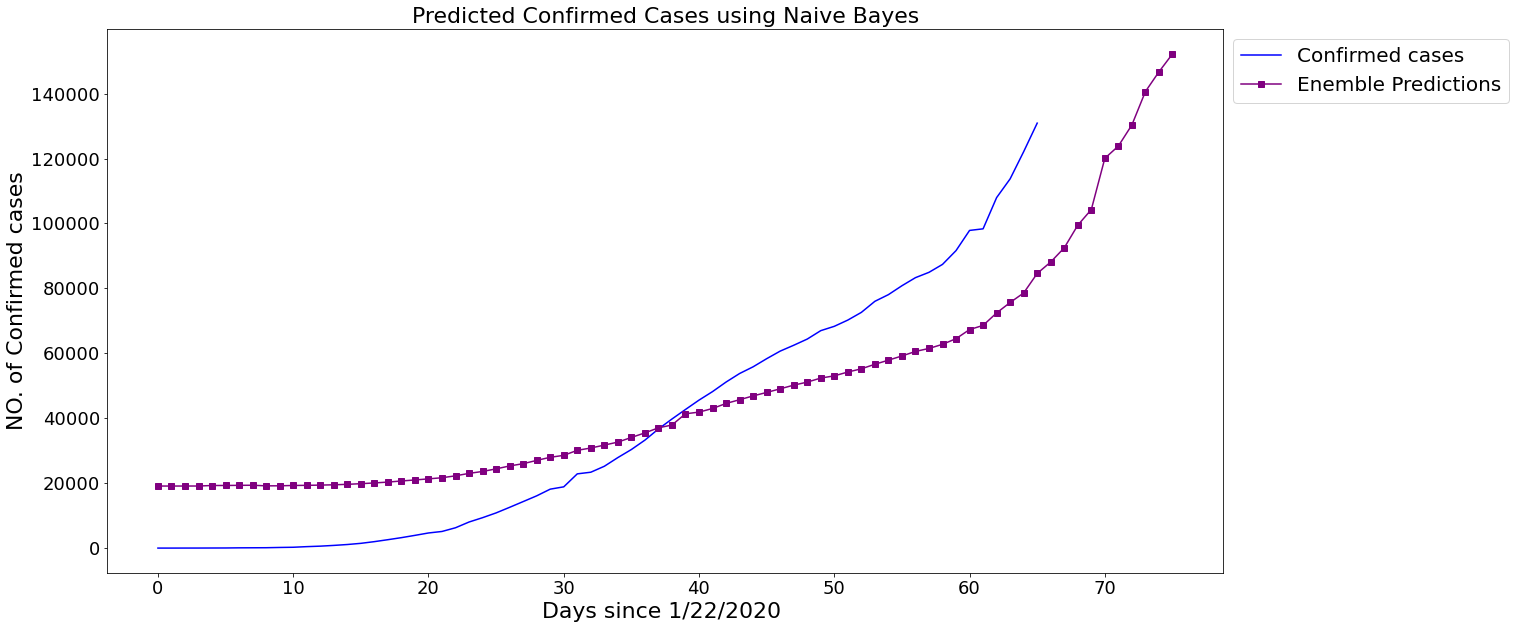

In [133]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
pred=Ens.predict(X)
plt.plot(y_t,color='blue',label='Confirmed cases')
plt.plot(pred,color='purple',label='Enemble Predictions',marker= "s")
plt.title('Predicted Confirmed Cases using Naive Bayes', fontsize=22)
plt.xlabel('Days since 1/22/2020 ',fontsize=22)
plt.ylabel('NO. of Confirmed cases', fontsize=22)
plt.legend(bbox_to_anchor=(1, 1),prop={"size":20})
plt.yticks(fontsize=18,)
plt.xticks(fontsize=18,)
plt.show()

# Evaluation Measures

### R2

In [53]:
y_pred = Ens.predict(X)
R_square=r2_score(y,y_pred)
print('R2 : ', round(R_square,3))

R2 :  0.684


### Adjusted R2 

In [54]:
print('Adjusted R2 :', round(1-(1-R_square)*(len(X)-1)/(len(X)-2-1), 4))

Adjusted R2 : 0.6755


### MSE

In [55]:
mse=mean_squared_error(y,y_pred)
print('Mean Squared Error: ', round(mse,2))

Mean Squared Error:  34836665919.42


### MAE

In [56]:
mae=mean_absolute_error(y,y_pred)
print('Mean Absolute Error: ', round(mae,2))

Mean Absolute Error:  98018.14


### RMSE

In [57]:
rmse = math.sqrt(mse)
print('RMSE: ', round(rmse,2))

RMSE:  186645.83


# Ensemble Technique to combine algorithms (GradientBoostingRegressor + random Forest Regressor) and making one

In [55]:
RF_model = RandomForestRegressor()
GB_model  = GradientBoostingRegressor()

In [56]:
Ens = VotingRegressor( estimators= [('model1',RF_model),('model2',GB_model)])
Ens= Ens.fit(X , y)
Ens

VotingRegressor(estimators=[('model1', RandomForestRegressor()),
                            ('model2', GradientBoostingRegressor())])

## Graph of the actual and predicted Confirmed cases with 10 days forecasting

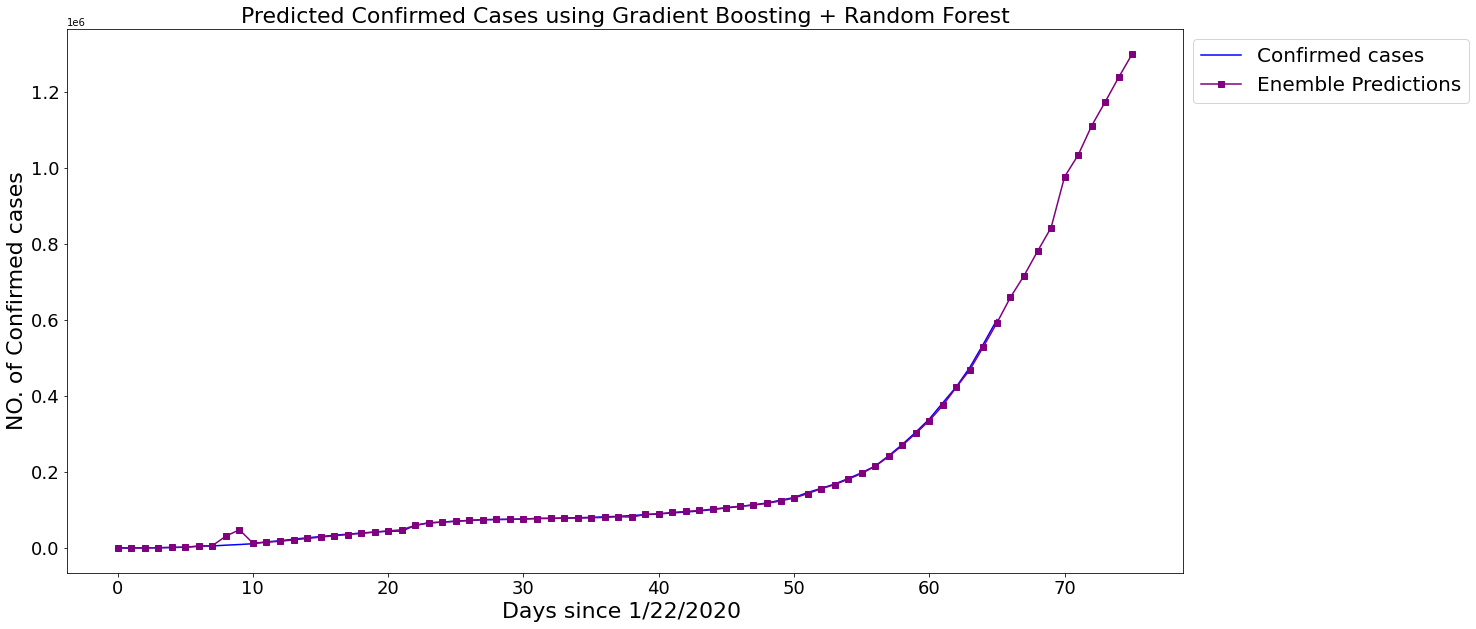

In [57]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
pred=Ens.predict(X)
plt.plot(y_t,color='blue',label='Confirmed cases')
plt.plot(pred,color='purple',label='Enemble Predictions',marker= "s")
plt.title('Predicted Confirmed Cases using Gradient Boosting + Random Forest', fontsize=22)
plt.xlabel('Days since 1/22/2020 ',fontsize=22)
plt.ylabel('NO. of Confirmed cases', fontsize=22)
plt.legend(bbox_to_anchor=(1, 1),prop={"size":20})
plt.yticks(fontsize=18,)
plt.xticks(fontsize=18,)
plt.show()

# Evaluation Measures

### R2

In [61]:
y_pred = Ens.predict(X)
R_square=r2_score(y,y_pred)
print('R2 : ', round(R_square,5))

R2 :  0.99937


### Adjusted R2

In [62]:
print('Adjusted R2 :', round(1-(1-R_square)*(len(X)-1)/(len(X)-2-1), 5))

Adjusted R2 : 0.99936


### MSE

In [63]:
mse=mean_squared_error(y,y_pred)
print('Mean Squared Error: ', round(mse,2))

Mean Squared Error:  69138158.83


### MAE

In [64]:
mae=mean_absolute_error(y,y_pred)
print('Mean Absolute Error: ', round(mae,2))

Mean Absolute Error:  4092.88


### RMSE

In [65]:
rmse = math.sqrt(mse)
print('RMSE: ', round(rmse,2))

RMSE:  8314.94


# Importing Recovred cases of COVID-19 directly from githubusercontent as updated dataset

In [59]:
data_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

### Selecting the Specific dates from as per paper

In [60]:
data_recovered=data_recovered.iloc[:,0:80]

# Exploratory data analysis

### Five top records of data

In [61]:
data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2,2,2,5,5,10,10,10,15,18
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,31,33,44,52,67,76,89,99,104,116
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31,31,37,46,61,61,62,90,90,90
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1,1,10,10,10,10,16,21,26,31
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,1,1,1,1,2,2,2


### Five last records of data

In [62]:
data_recovered.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,18,18,18,18,18,18,21,21,25,24
265,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,3,5
268,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Coloumns/features in data

In [63]:
data_recovered.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20'],
      dtype='object')

### Data information

In [64]:
data_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  73 non-null     object 
 1   Country/Region  269 non-null    object 
 2   Lat             268 non-null    float64
 3   Long            268 non-null    float64
 4   1/22/20         269 non-null    int64  
 5   1/23/20         269 non-null    int64  
 6   1/24/20         269 non-null    int64  
 7   1/25/20         269 non-null    int64  
 8   1/26/20         269 non-null    int64  
 9   1/27/20         269 non-null    int64  
 10  1/28/20         269 non-null    int64  
 11  1/29/20         269 non-null    int64  
 12  1/30/20         269 non-null    int64  
 13  1/31/20         269 non-null    int64  
 14  2/1/20          269 non-null    int64  
 15  2/2/20          269 non-null    int64  
 16  2/3/20          269 non-null    int64  
 17  2/4/20          269 non-null    int

### Data types of all coloumns

In [65]:
data_recovered.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/2/20              int64
4/3/20              int64
4/4/20              int64
4/5/20              int64
4/6/20              int64
Length: 80, dtype: object

### Checking Null Values and Province/State has Nan values, we will fix next

In [66]:
data_recovered[data_recovered.isnull().any(axis=1)].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2,2,2,5,5,10,10,10,15,18
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,31,33,44,52,67,76,89,99,104,116
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31,31,37,46,61,61,62,90,90,90
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1,1,10,10,10,10,16,21,26,31
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,1,1,1,1,2,2,2


### Count of Null values,  this count is 185 and all is from Province/State

In [67]:
np.sum(data_recovered.isnull().any(axis=1))

197

### Data Description, here we can see the values of columns as minimum value, maximum value, counts etc

In [68]:
data_recovered.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
count,268.000000,268.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,18.700014,27.186914,0.111524,0.118959,0.144981,0.156134,0.208178,0.241636,0.401487,0.472119,...,518.293680,553.446097,610.457249,660.977695,717.750929,781.479554,838.810409,914.691450,966.126394,1028.241636
std,25.330841,73.614830,1.711086,1.714940,1.903792,1.967499,2.591851,2.786758,4.911394,5.402128,...,4037.264923,4123.861205,4260.994622,4384.936385,4534.558717,4735.297950,4920.337534,5152.561846,5352.756268,5542.263846
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.454096,-9.496274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,19.584785,23.614150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,4.000000,6.000000,9.000000,11.000000,14.000000,16.000000,17.000000,26.000000
75%,39.132000,91.814200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,43.000000,52.000000,61.000000,73.000000,74.000000,81.000000,93.000000,116.000000,125.000000,133.000000
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,62098.000000,62570.000000,62889.000000,63153.000000,63326.000000,63471.000000,63612.000000,63762.000000,63945.000000,64014.000000


# Prepartion of data_recovered cases data

### Deleitng the Province/State	Country/Region	Lat	Long	 coloumns

In [69]:
data_recovered=data_recovered.drop(columns=['Province/State','Country/Region', 'Lat','Long'])

In [70]:
data_recovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,5,5,10,10,10,15,18
1,0,0,0,0,0,0,0,0,0,0,...,31,33,44,52,67,76,89,99,104,116
2,0,0,0,0,0,0,0,0,0,0,...,31,31,37,46,61,61,62,90,90,90
3,0,0,0,0,0,0,0,0,0,0,...,1,1,10,10,10,10,16,21,26,31
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,2,2,2


### Getting sum of all dates

In [71]:
data_recovered_cases=data_recovered.sum()
data_recovered_cases.head()

1/22/20    30
1/23/20    32
1/24/20    39
1/25/20    42
1/26/20    56
dtype: int64

### Saving the sum of all dates in dataframe

In [72]:
data_recovered_cases=pd.DataFrame(data_recovered_cases)
data_recovered_cases.head()

,0
1/22/20,30
1/23/20,32
1/24/20,39
1/25/20,42
1/26/20,56


### Creating new column of Dates

In [73]:
data_recovered_cases['Dates']=data_recovered_cases.index
data_recovered_cases.head()

,0,Dates
1/22/20,30,1/22/20
1/23/20,32,1/23/20
1/24/20,39,1/24/20
1/25/20,42,1/25/20
1/26/20,56,1/26/20


### Reseting the index

In [74]:
data_recovered_cases=data_recovered_cases.reset_index(drop=True)
data_recovered_cases.head()

,0,Dates
0,30,1/22/20
1,32,1/23/20
2,39,1/24/20
3,42,1/25/20
4,56,1/26/20


### Renaming the column

In [75]:
data_recovered_cases=data_recovered_cases.rename(columns={0:'data_recovered_cases'})
data_recovered_cases=data_recovered_cases[['Dates','data_recovered_cases']]
data_recovered_cases.head()

,Dates,data_recovered_cases
0,1/22/20,30
1,1/23/20,32
2,1/24/20,39
3,1/25/20,42
4,1/26/20,56


### Date settings and data preparation

In [76]:
data_recovered_cases['times'] = pd.to_datetime(data_recovered_cases['Dates'])  
data_recovered_cases.set_index('times', inplace=True)                   
data_recovered_cases.sort_index(ascending=True, inplace=True)
tar='Recovered Predictions'
data_recovered_cases.rename(columns={'data_recovered_cases':tar}, inplace=True)
data_recovered_cases=data_recovered_cases[[tar]]

### Spliting date into  month, year and Day of month

In [125]:
def create_features(data, label=None):
    data['date'] = data.index
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofmonth'] = data['date'].dt.day
    X = data[['month','year','dayofmonth']]
    if label:
        y = data[label]
        return X, y
    return X

### Data for training input and prediction output

In [126]:
X=data_recovered_cases.copy()
X= create_features(X)
y=data_recovered_cases
y=np.array(y)
y_t = y[:int(0.87*(len(y)))]

# Ensemble Technique to combine algorithms (SVM + Random Forest Regression) and making one

In [127]:
SVR_model = SVR()
RF_model  = RandomForestRegressor()

In [128]:
Ens = VotingRegressor( estimators= [('model1',SVR_model),('model2',RF_model)])
Ens= Ens.fit(X , y)
Ens

VotingRegressor(estimators=[('model1', SVR()),
                            ('model2', RandomForestRegressor())])

## Graph of the actual and predicted Recovred cases with 10 days forecasting

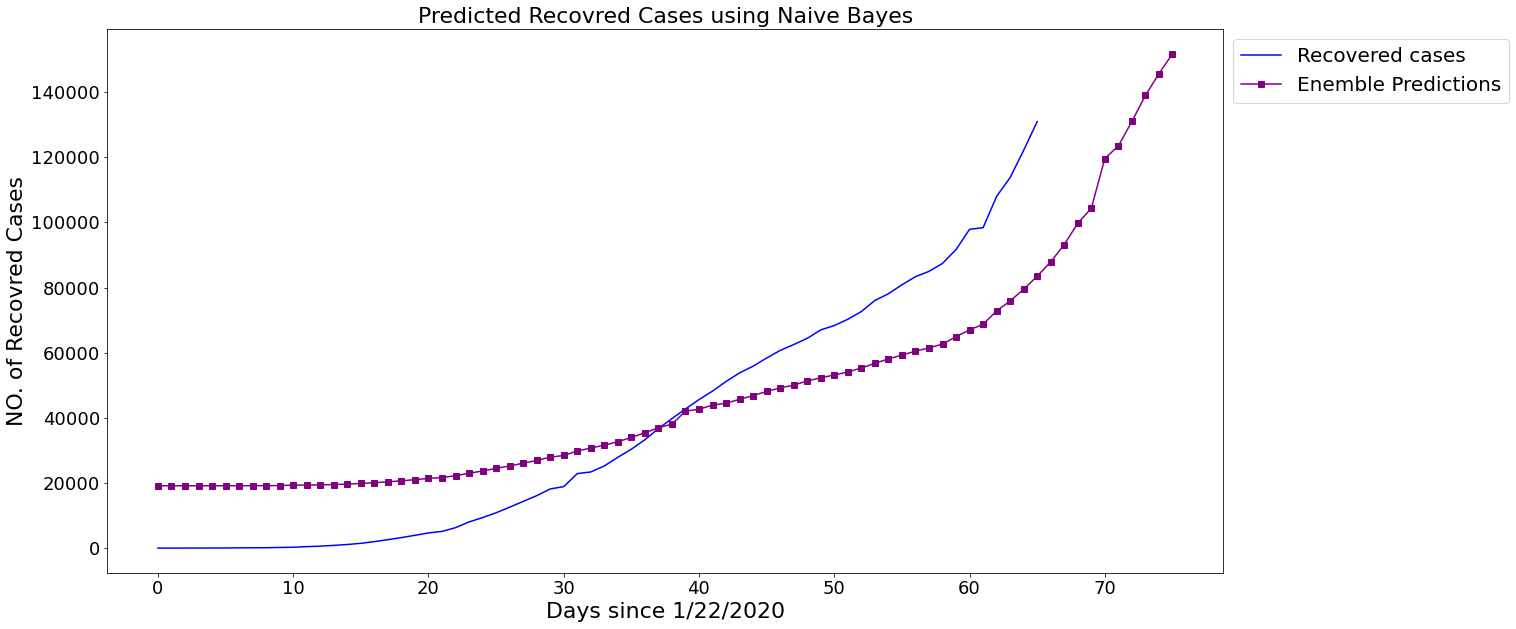

In [129]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
pred=Ens.predict(X)
plt.plot(y_t,color='blue',label='Recovered cases')
plt.plot(pred,color='purple',label='Enemble Predictions',marker= "s")
plt.title('Predicted Recovred Cases using Naive Bayes', fontsize=22)
plt.xlabel('Days since 1/22/2020', fontsize=22)
plt.ylabel('NO. of Recovred Cases',  fontsize=22)
plt.legend(bbox_to_anchor=(1, 1),prop={"size":20})
plt.yticks(fontsize=18,)
plt.xticks(fontsize=18,)
plt.legend(bbox_to_anchor=(1, 1),prop={"size":20})
plt.show()

# Evaluation Measures

### R2

In [89]:
y_pred = Ens.predict(X)
R_square=r2_score(y,y_pred)
print('R2 : ', round(R_square,3))

R2 :  0.713


### Adjusted R2 

In [90]:
print('Adjusted R2 :', round(1-(1-R_square)*(len(X)-1)/(len(X)-2-1), 3))

Adjusted R2 : 0.705


### MSE

In [91]:
mse=mean_squared_error(y,y_pred)
print('Mean Squared Error: ', round(mse,2))

Mean Squared Error:  1335741927.85


### MAE

In [92]:
mae=mean_absolute_error(y,y_pred)
print('Mean Absolute Error: ', round(mae,2))

Mean Absolute Error:  25459.42


### RMSE

In [93]:
rmse = math.sqrt(mse)
print('RMSE: ', round(rmse,2))

RMSE:  36547.8


# Ensemble Technique to combine algorithms (GradientBoostingRegressor + random Forest Regressor) and making one

In [88]:
RF_model = RandomForestRegressor()
GB_model  = GradientBoostingRegressor()

In [89]:
Ens = VotingRegressor( estimators= [('model1',RF_model),('model2',GB_model)])
Ens= Ens.fit(X , y)
Ens

VotingRegressor(estimators=[('model1', RandomForestRegressor()),
                            ('model2', GradientBoostingRegressor())])

## Graph of the actual and predicted Recovered cases with 10 days forecasting

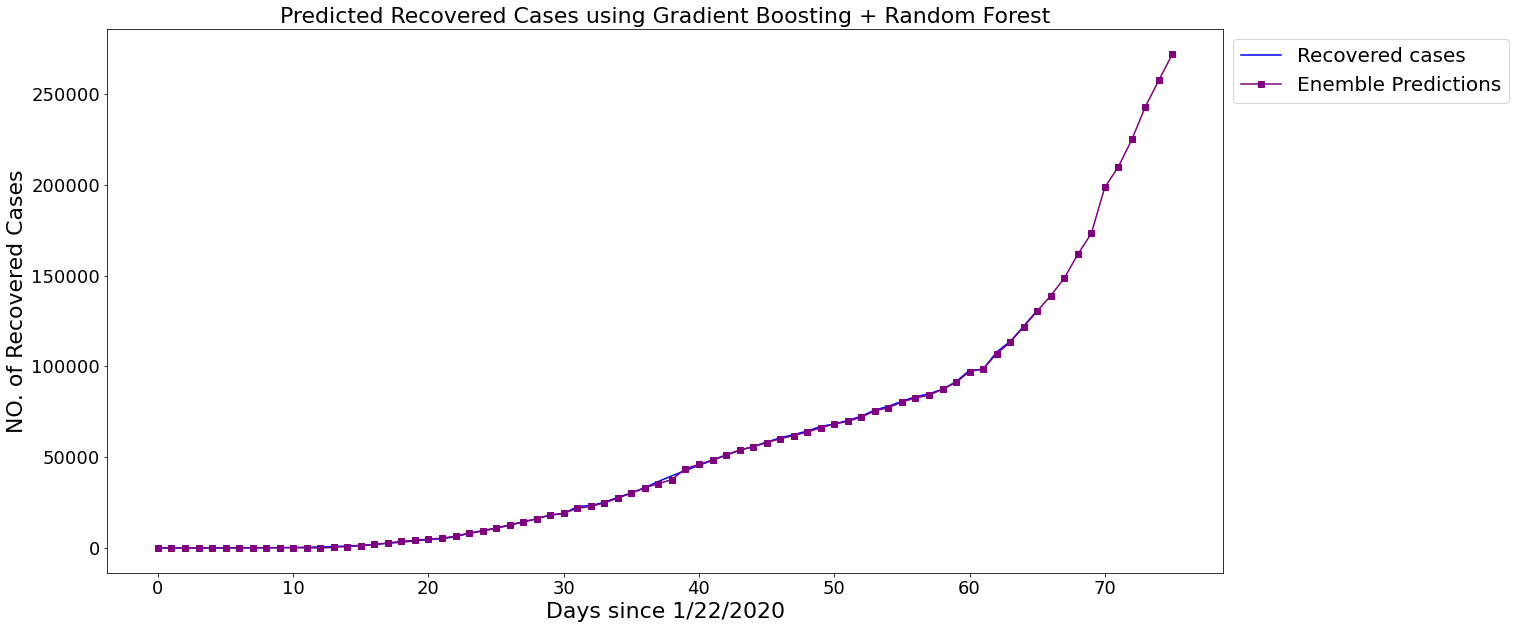

In [91]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
pred=Ens.predict(X)
plt.plot(y_t,color='blue',label='Recovered cases')
plt.plot(pred,color='purple',label='Enemble Predictions',marker= "s")
plt.title('Predicted Recovered Cases using Gradient Boosting + Random Forest', fontsize=22)
plt.xlabel('Days since 1/22/2020', fontsize=22)
plt.ylabel('NO. of Recovered Cases', fontsize=22)
plt.legend(bbox_to_anchor=(1, 1), prop={"size":20})
plt.yticks(fontsize=18,)
plt.xticks(fontsize=18,)
plt.show()

# Evaluation Measures

### R2

In [97]:
y_pred = Ens.predict(X)
R_square=r2_score(y,y_pred)
print('R2 : ', round(R_square,5))

R2 :  0.99964


### Adjusted R2

In [98]:
print('Adjusted R2 :', round(1-(1-R_square)*(len(X)-1)/(len(X)-2-1), 5))

Adjusted R2 : 0.99963


### MSE

In [99]:
mse=mean_squared_error(y,y_pred)
print('Mean Squared Error: ', round(mse,2))

Mean Squared Error:  1682739.6


### MAE

In [100]:
mae=mean_absolute_error(y,y_pred)
print('Mean Absolute Error: ', round(mae,2))

Mean Absolute Error:  711.0


### RMSE

In [101]:
rmse = math.sqrt(mse)
print('RMSE: ', round(rmse,2))

RMSE:  1297.2


# Importing Deaths cases of COVID-19 directly from githubusercontent as updated dataset

In [92]:
data_deaths=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

### Selecting the Specific dates from  as per paper

In [93]:
data_deaths=data_deaths.iloc[:,0:80]

# Exploratory data analysis

### Five top records of data

In [94]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2,4,4,4,4,4,5,5,7,7
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10,10,11,15,15,16,17,20,20,21
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,29,31,35,44,58,86,105,130,152,173
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3,6,8,12,14,15,16,17,18,21
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,2,2,2,2,2,2,2,2,2


### Five last records of data

In [95]:
data_deaths.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
283,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


### Coloumns/features in data

In [96]:
data_deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20'],
      dtype='object')

### Data information

In [97]:
data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  89 non-null     object 
 1   Country/Region  284 non-null    object 
 2   Lat             282 non-null    float64
 3   Long            282 non-null    float64
 4   1/22/20         284 non-null    int64  
 5   1/23/20         284 non-null    int64  
 6   1/24/20         284 non-null    int64  
 7   1/25/20         284 non-null    int64  
 8   1/26/20         284 non-null    int64  
 9   1/27/20         284 non-null    int64  
 10  1/28/20         284 non-null    int64  
 11  1/29/20         284 non-null    int64  
 12  1/30/20         284 non-null    int64  
 13  1/31/20         284 non-null    int64  
 14  2/1/20          284 non-null    int64  
 15  2/2/20          284 non-null    int64  
 16  2/3/20          284 non-null    int64  
 17  2/4/20          284 non-null    int

### Data types of all coloumns

In [98]:
data_deaths.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/2/20              int64
4/3/20              int64
4/4/20              int64
4/5/20              int64
4/6/20              int64
Length: 80, dtype: object

### Checking Null Values and Province/State has Nan values, we will fix next

In [99]:
data_deaths[data_deaths.isnull().any(axis=1)].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2,4,4,4,4,4,5,5,7,7
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10,10,11,15,15,16,17,20,20,21
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,29,31,35,44,58,86,105,130,152,173
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3,6,8,12,14,15,16,17,18,21
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,2,2,2,2,2,2,2,2,2


### Count of Null values,  this count is 185 and all is from Province/State

In [100]:
np.sum(data_deaths.isnull().any(axis=1))

197

### Data Description, here we can see the values of columns as minimum value, maximum value, counts etc

In [101]:
data_deaths.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
count,282.000000,282.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,20.106368,21.958718,0.059859,0.063380,0.091549,0.147887,0.197183,0.288732,0.461268,0.468310,...,113.992958,126.190141,140.475352,157.257042,178.570423,199.271127,221.190141,242.186620,260.883803,281.538732
std,25.841453,75.893366,1.008764,1.010299,1.426181,2.374622,3.087051,4.510813,7.417526,7.418036,...,767.031993,837.939311,919.762961,1007.628637,1114.567681,1223.997203,1340.273681,1457.505475,1559.440462,1676.335386
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.643279,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.607879,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,40.950592,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.250000,6.000000,7.000000,8.000000,8.250000,10.000000,11.250000,12.000000,15.000000,16.500000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,10023.000000,10779.000000,11591.000000,12428.000000,13155.000000,13915.000000,14681.000000,15362.000000,15887.000000,16523.000000


# Prepartion of data_confirmed_cases data

### Deleitng the Province/State	Country/Region	Lat	Long	 coloumns

In [102]:
data_deaths=data_deaths.drop(columns=['Province/State','Country/Region', 'Lat','Long'])

In [103]:
data_deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,0,0,0,0,0,0,0,0,0,0,...,2,4,4,4,4,4,5,5,7,7
1,0,0,0,0,0,0,0,0,0,0,...,10,10,11,15,15,16,17,20,20,21
2,0,0,0,0,0,0,0,0,0,0,...,29,31,35,44,58,86,105,130,152,173
3,0,0,0,0,0,0,0,0,0,0,...,3,6,8,12,14,15,16,17,18,21
4,0,0,0,0,0,0,0,0,0,0,...,0,2,2,2,2,2,2,2,2,2


### Getting sum of all dates

In [104]:
data_deaths=data_deaths.sum()
data_deaths.head()

1/22/20    17
1/23/20    18
1/24/20    26
1/25/20    42
1/26/20    56
dtype: int64

### Saving the sum of all dates in dataframe

In [105]:
data_deaths_cases=pd.DataFrame(data_deaths)
data_deaths_cases.head()

,0
1/22/20,17
1/23/20,18
1/24/20,26
1/25/20,42
1/26/20,56


### Creating new column of Dates

In [106]:
data_deaths_cases['Dates']=data_deaths_cases.index
data_deaths_cases.head()

,0,Dates
1/22/20,17,1/22/20
1/23/20,18,1/23/20
1/24/20,26,1/24/20
1/25/20,42,1/25/20
1/26/20,56,1/26/20


### Reseting the index

In [107]:
data_deaths_cases=data_deaths_cases.reset_index(drop=True)
data_deaths_cases.head()

,0,Dates
0,17,1/22/20
1,18,1/23/20
2,26,1/24/20
3,42,1/25/20
4,56,1/26/20


### Renaming the column

In [108]:
data_deaths_cases=data_deaths_cases.rename(columns={0:'data_deaths_cases'})
data_deaths_cases=data_deaths_cases[['Dates','data_deaths_cases']]
data_deaths_cases.head()

,Dates,data_deaths_cases
0,1/22/20,17
1,1/23/20,18
2,1/24/20,26
3,1/25/20,42
4,1/26/20,56


### Date settings and data preparation

In [109]:
data_deaths_cases['times'] = pd.to_datetime(data_deaths_cases['Dates'])  
data_deaths_cases.set_index('times', inplace=True)                   
data_deaths_cases.sort_index(ascending=True, inplace=True)
tar='Deaths Predictions'
data_deaths_cases.rename(columns={'data_deaths_cases':tar}, inplace=True)
data_deaths_cases=data_deaths_cases[[tar]]

### Spliting date into  month, year and Day of month

In [110]:
def create_features(data, label=None):
    data['date'] = data.index
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofmonth'] = data['date'].dt.day
    X = data[['month','year','dayofmonth']]
    if label:
        y = data[label]
        return X, y
    return X

### Data for training input and prediction output

In [111]:
X=data_deaths_cases.copy()
X= create_features(X)
y=data_deaths_cases
y=np.array(y)
y_t = y[:int(0.87*(len(y)))]

# Ensemble Technique to combine algorithms (SVM + Random Forest Regression) and making one

In [118]:
SVR_model = SVR()
RF_model  = RandomForestRegressor()

In [119]:
Ens = VotingRegressor( estimators= [('model1',SVR_model),('model2',RF_model)])
Ens= Ens.fit(X , y)
Ens

VotingRegressor(estimators=[('model1', SVR()),
                            ('model2', RandomForestRegressor())])

Graph of the actual and predicted Deaths with 10 days forecasting

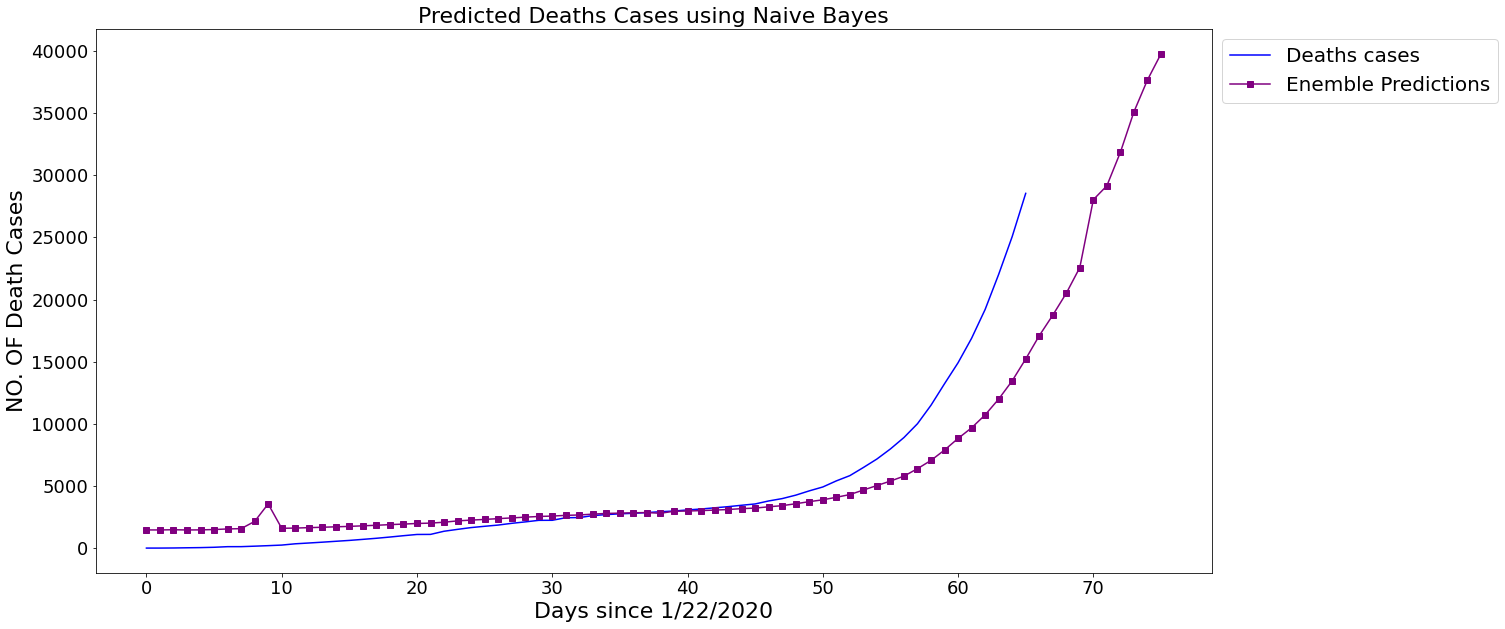

In [120]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
pred=Ens.predict(X)
plt.plot(y_t,color='blue',label='Deaths cases')
plt.plot(pred,color='purple',label='Enemble Predictions',marker= "s")
plt.title('Predicted Deaths Cases using Naive Bayes', fontsize=22)
plt.xlabel('Days since 1/22/2020', fontsize=22)
plt.ylabel('NO. OF Death Cases', fontsize=22)
plt.legend(bbox_to_anchor=(1, 1), prop={"size":20})
plt.yticks(fontsize=18,)
plt.xticks(fontsize=18,)
plt.show()

# Evaluation Measures

### R2

In [125]:
y_pred = Ens.predict(X)
R_square=r2_score(y,y_pred)
print('R2 : ', round(R_square,3))

R2 :  0.692


### Adjusted R2 

In [126]:
print('Adjusted R2 :', round(1-(1-R_square)*(len(X)-1)/(len(X)-2-1), 3))

Adjusted R2 : 0.683


### MSE

In [127]:
mse=mean_squared_error(y,y_pred)
print('Mean Squared Error: ', round(mse,2))

Mean Squared Error:  106804953.79


### MAE

In [128]:
mae=mean_absolute_error(y,y_pred)
print('Mean Absolute Error: ', round(mae,2))

Mean Absolute Error:  5032.5


### RMSE

In [129]:
rmse = math.sqrt(mse)
print('RMSE: ', round(rmse,2))

RMSE:  10334.65


# Ensemble Technique to combine algorithms (GradientBoostingRegressor + random Forest Regressor) and making one

In [135]:
RF_model = RandomForestRegressor()
GB_model  = GradientBoostingRegressor()

In [136]:
Ens = VotingRegressor( estimators= [('model1',RF_model),('model2',GB_model)])
Ens= Ens.fit(X , y)
Ens

VotingRegressor(estimators=[('model1', RandomForestRegressor()),
                            ('model2', GradientBoostingRegressor())])

# Graph of the actual and predicted Deaths with 10 days forecasting

### R2

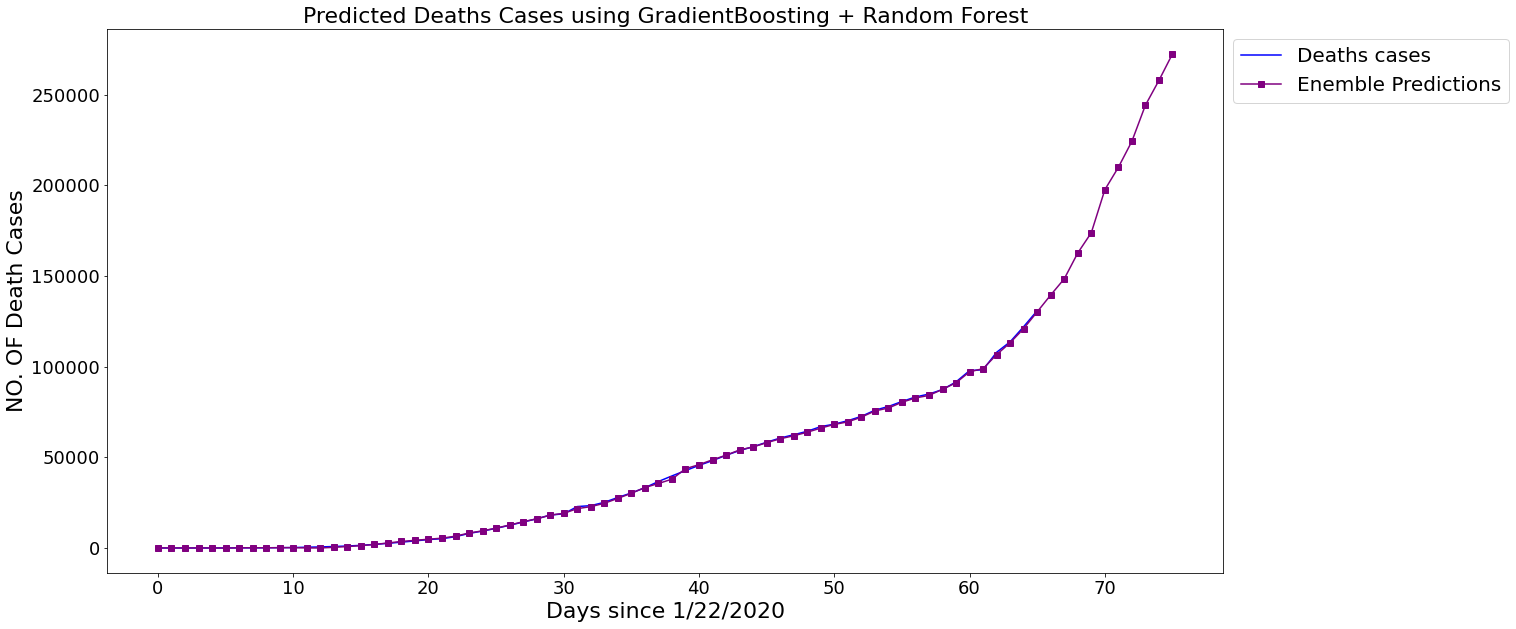

In [137]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
pred=Ens.predict(X)
plt.plot(y_t,color='blue',label='Deaths cases')
plt.plot(pred,color='purple',label='Enemble Predictions',marker= "s")
plt.title('Predicted Deaths Cases using GradientBoosting + Random Forest', fontsize=22)
plt.xlabel('Days since 1/22/2020', fontsize=22)
plt.ylabel('NO. OF Death Cases', fontsize=22)
plt.legend(bbox_to_anchor=(1, 1), prop={"size":20})
plt.yticks(fontsize=18,)
plt.xticks(fontsize=18,)


plt.show()

# Evaluation Measures

In [105]:
y_pred = Ens.predict(X)
R_square=r2_score(y,y_pred)
print('R2 : ', round(R_square,5))

R2 :  0.99942


### Adjusted R2

In [106]:
print('Adjusted R2 :', round(1-(1-R_square)*(len(X)-1)/(len(X)-2-1), 5))

Adjusted R2 : 0.99941


### MSE

In [107]:
mse=mean_squared_error(y,y_pred)
print('Mean Squared Error: ', round(mse,2))

Mean Squared Error:  200297.36


### MAE

In [108]:
mae=mean_absolute_error(y,y_pred)
print('Mean Absolute Error: ', round(mae,2))

Mean Absolute Error:  215.2


### RMSE

In [109]:
rmse = math.sqrt(mse)
print('RMSE: ', round(rmse,2))

RMSE:  447.55


# ----------------------------------------------------------------------------------------------------------